# CDF dan Modeling

Dataset Chiller from B7 dan SAKA

## 1. Load Dataset

ChatGPT Prompt:

Berikan saya code untuk  Cara menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ChatGPT Prompt:

Beri kode untuk membaca dataset "Chiller.xlsx" disimpan dengan nama dataframe 'df', sesuaikan path filenya

In [2]:
import pandas as pd

# Ganti dengan path yang sesuai ke file Chiller.xlsx di Google Drive Anda
file_path = '/content/drive/My Drive/Dataset/Chiller.xlsx'

# Membaca file Excel ke dalam DataFrame pandas
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()


,Evap LWT,Evap EWT,Unit Capacity,Evap Sat Temperature,Cond Sat Temperature,Suction Temperature,Discharge Temperature,Oil Pressure,Run Hour Kompressor,Ampere Kompressor,"No, Of Start",Tekanan Return Chiller,Tekanan Supply Chiller,Inlet Softwater,Tekanan Sebelum Pompa,Tekanan Sesudah Pompa,Ampere R-S,Ampere S-T
0,5.8,9.7,44.0,1.6,44.9,6.6,63.6,1007.2,17924,133.6,1336,5.0,4.6,3.0,4.6,6.4,143.0,146.2
1,5.8,9.8,46.0,1.4,44.9,6.6,63.9,1007.2,17926,134.5,1336,5.0,4.6,3.0,4.6,6.4,121.0,116.2
2,5.8,9.8,46.0,2.3,44.2,7.6,62.5,976.4,17927,132.7,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5
3,6.1,10.4,46.0,2.3,40.4,6.8,60.6,844.0,17930,120.4,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5
4,5.8,9.9,48.0,2.0,39.8,7.0,59.3,968.5,17931,118.5,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5


## 2. Cumulative Distribution Function

### 2.1. CDF for Visualizing Distributions

ChatGPT Prompt: Berikan code untuk menampilkan CDF pada kolom "Cond Sat Temperature" pada dataset dengan Line Graph, Step Function, Histogram, dan Emprical CDF

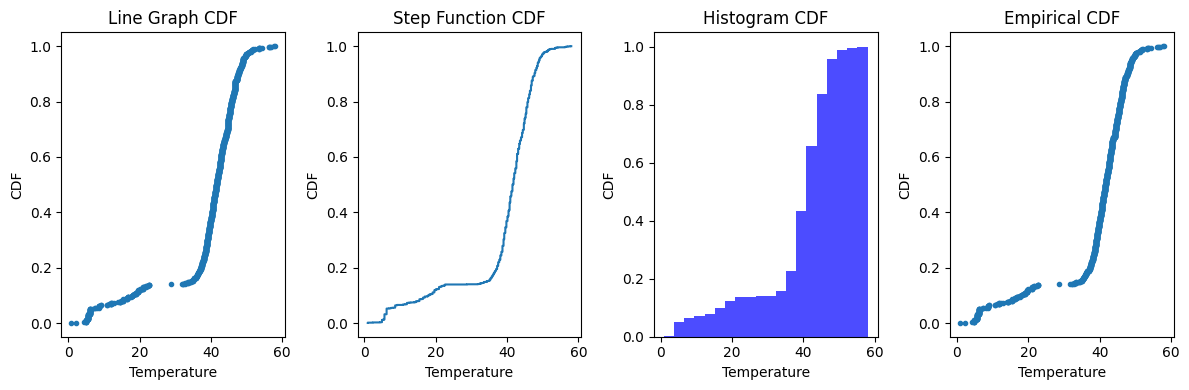

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dataset dari file Excel
df = pd.read_excel(file_path)  # Pastikan Anda telah membaca dataset sebelumnya

# Mengambil kolom "Cond Sat Temperature"
cond_sat_temp = df['Cond Sat Temperature'].dropna()  # Menghapus nilai NaN jika ada

# Mengurutkan data
sorted_data = np.sort(cond_sat_temp)

# Menghitung probabilitas kumulatif
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Line Graph CDF
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.title('Line Graph CDF')

# Step Function CDF
plt.subplot(1, 4, 2)
plt.step(sorted_data, cdf)
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.title('Step Function CDF')

# Histogram
plt.subplot(1, 4, 3)
plt.hist(cond_sat_temp, bins=20, density=True, cumulative=True, alpha=0.7, color='b')
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.title('Histogram CDF')

# Empirical CDF
plt.subplot(1, 4, 4)
plt.plot(sorted_data, cdf, marker='.', linestyle='none', label='ECDF')
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.title('Empirical CDF')

plt.tight_layout()
plt.show()


### 2.2. CDF for Comparing Distributions

ChatGPT Prompt: Pada sel selanjutnya di google colab, berikan code untuk menampilkan perbandingan CDF pada kolom "Evap LWT", "Evap EWT", dan  "Evap Sat Temperature" pada dataset tersebut dalam satu grafik.

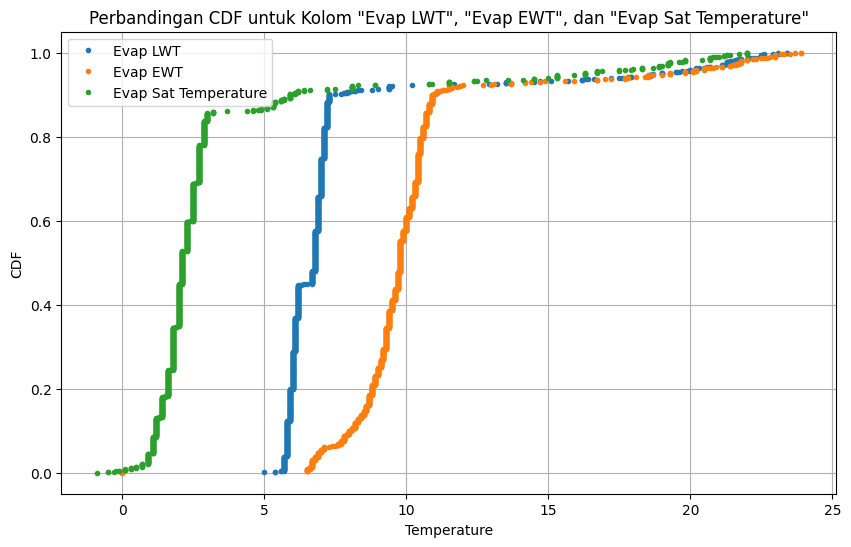

In [4]:
# Membaca dataset dari file Excel
df = pd.read_excel(file_path)  # Pastikan Anda telah membaca dataset sebelumnya

# Mengambil kolom yang akan dibandingkan
evap_lwt = df['Evap LWT'].dropna()
evap_ewt = df['Evap EWT'].dropna()
evap_sat_temp = df['Evap Sat Temperature'].dropna()

# Mengurutkan data
sorted_evap_lwt = np.sort(evap_lwt)
sorted_evap_ewt = np.sort(evap_ewt)
sorted_evap_sat_temp = np.sort(evap_sat_temp)

# Menghitung probabilitas kumulatif
cdf_evap_lwt = np.arange(1, len(sorted_evap_lwt) + 1) / len(sorted_evap_lwt)
cdf_evap_ewt = np.arange(1, len(sorted_evap_ewt) + 1) / len(sorted_evap_ewt)
cdf_evap_sat_temp = np.arange(1, len(sorted_evap_sat_temp) + 1) / len(sorted_evap_sat_temp)

# Plot perbandingan CDF dalam satu grafik
plt.figure(figsize=(10, 6))
plt.plot(sorted_evap_lwt, cdf_evap_lwt, marker='.', linestyle='none', label='Evap LWT')
plt.plot(sorted_evap_ewt, cdf_evap_ewt, marker='.', linestyle='none', label='Evap EWT')
plt.plot(sorted_evap_sat_temp, cdf_evap_sat_temp, marker='.', linestyle='none', label='Evap Sat Temperature')

plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.legend()
plt.title('Perbandingan CDF untuk Kolom "Evap LWT", "Evap EWT", dan "Evap Sat Temperature"')
plt.grid(True)

plt.show()


### 2.3. Percentiles Based Statistics

ChatGPT Prompt: Berikan code untuk menampilkan batas data outliers pada grafik CDF untuk kolom "Discharge Temperature", kemudian tampilkan pula grafik boxplot sebagai perbandingan

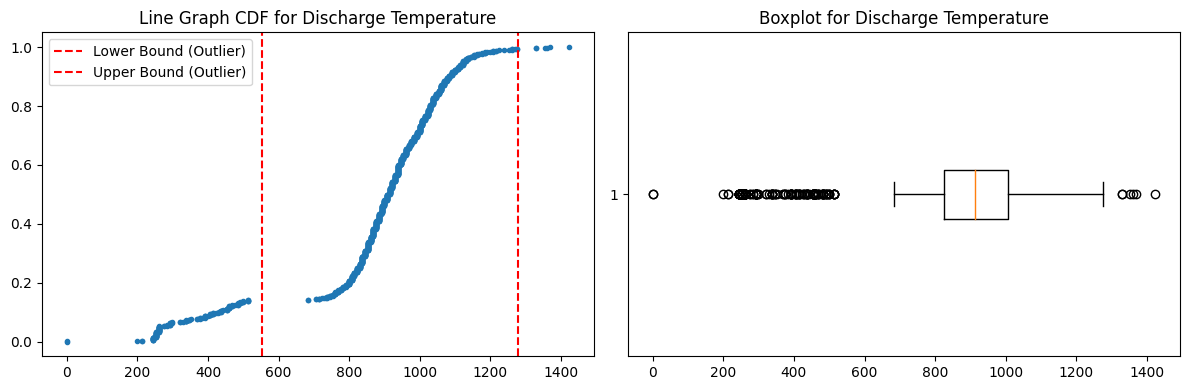

Lower Bound (Outlier): 554.42
Upper Bound (Outlier): 1279.42


In [11]:

# Mengambil kolom "Discharge Temperature" dari DataFrame
discharge_temperature = df["Discharge Temperature"]

# Mengurutkan nilai-nilai dalam kolom
sorted_values = np.sort(discharge_temperature)

# Membangun CDF
cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

# Menentukan batas outlier dengan metode IQR
Q1 = np.percentile(discharge_temperature, 25)
Q3 = np.percentile(discharge_temperature, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat grafik CDF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(sorted_values, cdf, marker='.', linestyle='none')
plt.title("Line Graph CDF for Discharge Temperature")

# Menampilkan batas outlier pada grafik CDF
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound (Outlier)')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound (Outlier)')
plt.legend()

# Membuat grafik boxplot
plt.subplot(122)
plt.boxplot(discharge_temperature, vert=False)
plt.title("Boxplot for Discharge Temperature")

plt.tight_layout()
plt.show()

# Menampilkan batas outlier
print(f"Lower Bound (Outlier): {lower_bound:.2f}")
print(f"Upper Bound (Outlier): {upper_bound:.2f}")


### 2.4. Checking Distribution Fit

ChatGPT Prompt: Berikan code untuk memvisualisasikan perbandingan ECDF menggunakan statsmodels dan Theorretical Normal CDF pada kolom "Oil Pressure"

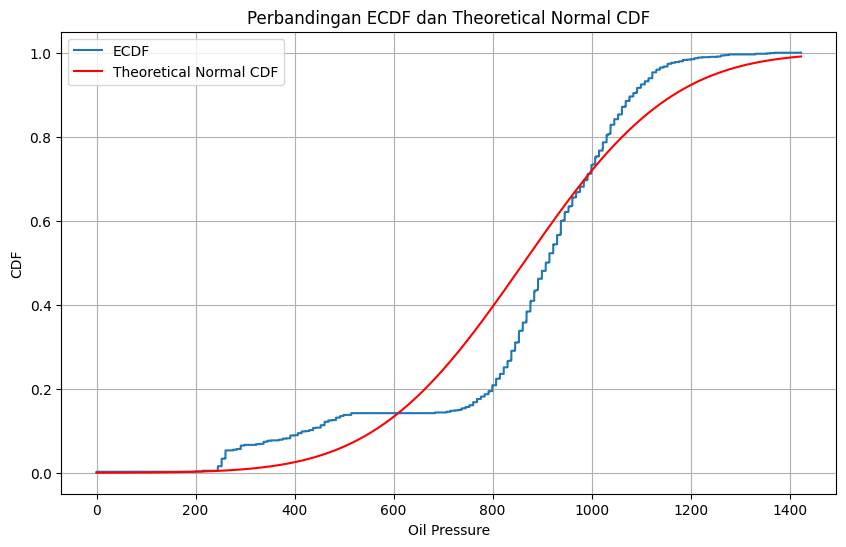

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Mengambil kolom "Oil Pressure" dari DataFrame
oil_pressure = df["Oil Pressure"]

# Menghitung ECDF
ecdf = sm.distributions.ECDF(oil_pressure)

# Membangun array nilai-nilai yang akan dihitung CDF teoretis
x = np.linspace(min(oil_pressure), max(oil_pressure), 1000)

# Menghitung CDF teoretis distribusi normal dengan mean dan std dari data
mean = oil_pressure.mean()
std = oil_pressure.std()
cdf_normal = stats.norm.cdf(x, loc=mean, scale=std)

# Membuat grafik perbandingan ECDF dan CDF teoretis
plt.figure(figsize=(10, 6))
plt.step(ecdf.x, ecdf.y, label='ECDF')
plt.plot(x, cdf_normal, label='Theoretical Normal CDF', color='red')
plt.title("Perbandingan ECDF dan Theoretical Normal CDF")
plt.xlabel("Oil Pressure")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)

plt.show()


## 3. Modeling Distribution


ChatGPT Prompt: Tampilkan kode Python berikut yang digunakan untuk mengkonstruksi distribusi eksponensial, distribusi normal, normal probability plot, distribusi log-normal, dan distribusi Pareto untuk kolom "Ampere S-T" dalam dataset


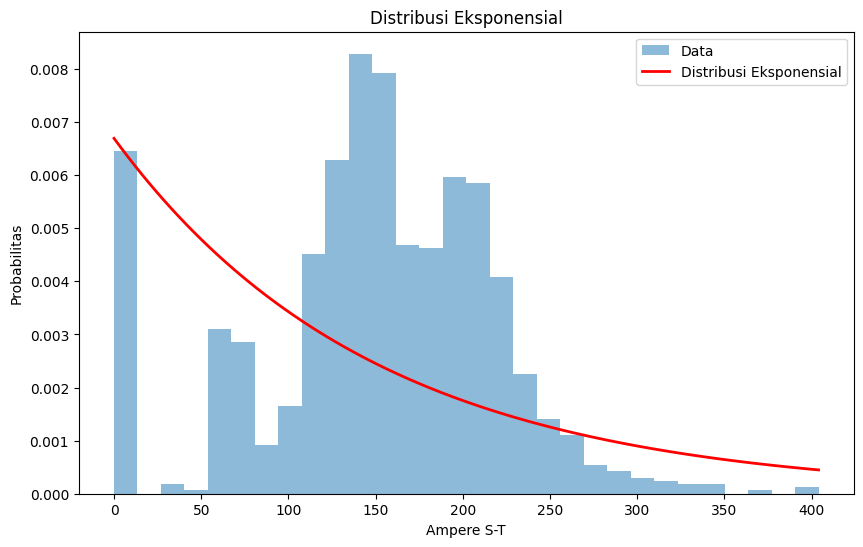

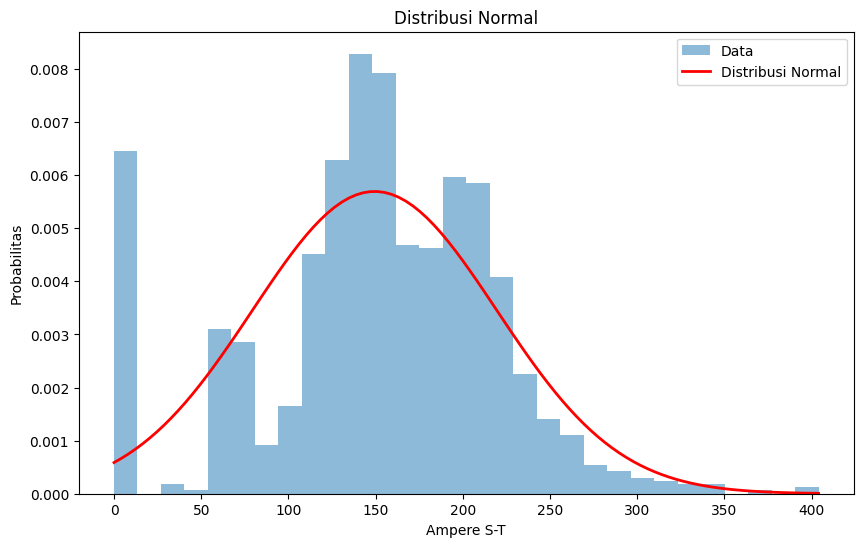

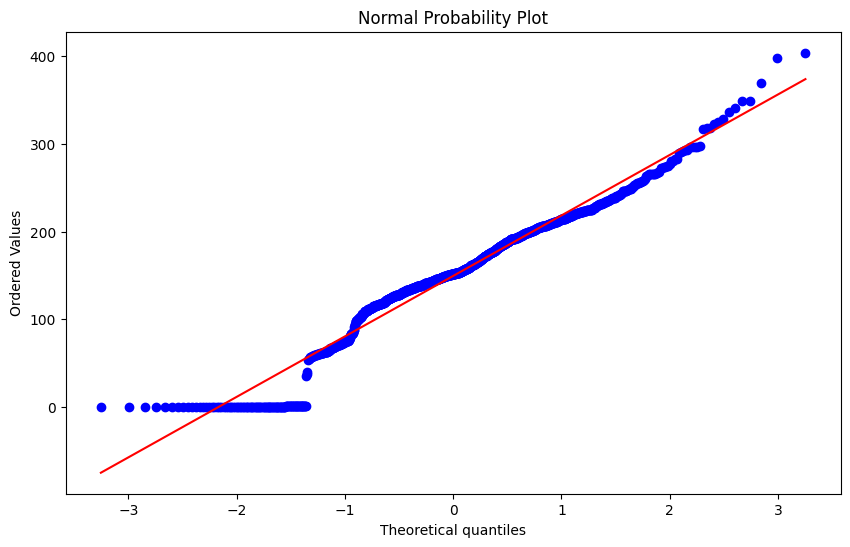

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1992: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)


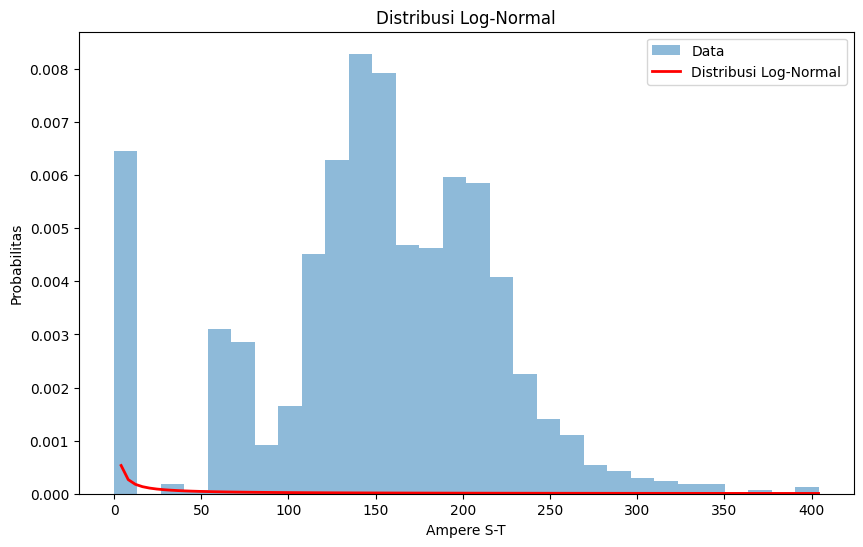

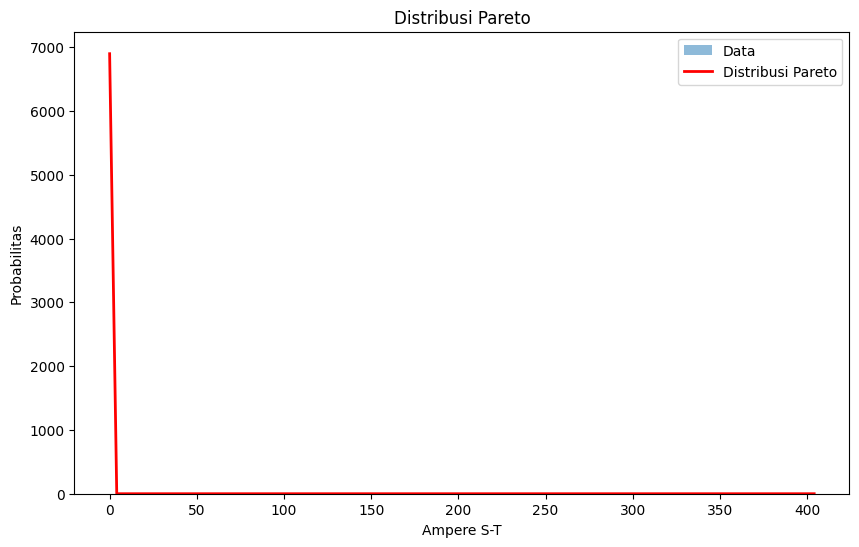

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, probplot, lognorm, pareto
import pandas as pd


# Ambil kolom "Ampere R-S" sebagai data
ampere_st = df['Ampere S-T']

# Konstruksi Distribusi Eksponensial
params = expon.fit(ampere_st)
plt.figure(figsize=(10, 6))
plt.hist(ampere_st, bins=30, density=True, alpha=0.5, label='Data')
x = np.linspace(min(ampere_st), max(ampere_st), 100)
pdf = expon.pdf(x, *params)
plt.plot(x, pdf, 'r-', lw=2, label='Distribusi Eksponensial')
plt.xlabel('Ampere S-T')
plt.ylabel('Probabilitas')
plt.title('Distribusi Eksponensial')
plt.legend()
plt.show()

# Konstruksi Distribusi Normal
params = norm.fit(ampere_st)
plt.figure(figsize=(10, 6))
plt.hist(ampere_st, bins=30, density=True, alpha=0.5, label='Data')
x = np.linspace(min(ampere_st), max(ampere_st), 100)
pdf = norm.pdf(x, *params)
plt.plot(x, pdf, 'r-', lw=2, label='Distribusi Normal')
plt.xlabel('Ampere S-T')
plt.ylabel('Probabilitas')
plt.title('Distribusi Normal')
plt.legend()
plt.show()

# Normal Probability Plot
plt.figure(figsize=(10, 6))
probplot(ampere_st, dist="norm", plot=plt)
plt.title('Normal Probability Plot')
plt.show()

# Konstruksi Distribusi Log-Normal
params = lognorm.fit(ampere_st)
plt.figure(figsize=(10, 6))
plt.hist(ampere_st, bins=30, density=True, alpha=0.5, label='Data')
x = np.linspace(min(ampere_st), max(ampere_st), 100)
pdf = lognorm.pdf(x, *params)
plt.plot(x, pdf, 'r-', lw=2, label='Distribusi Log-Normal')
plt.xlabel('Ampere S-T')
plt.ylabel('Probabilitas')
plt.title('Distribusi Log-Normal')
plt.legend()
plt.show()

# Konstruksi Distribusi Pareto
params = pareto.fit(ampere_st)
plt.figure(figsize=(10, 6))
plt.hist(ampere_st, bins=30, density=True, alpha=0.5, label='Data')
x = np.linspace(min(ampere_st), max(ampere_st), 100)
pdf = pareto.pdf(x, *params)
plt.plot(x, pdf, 'r-', lw=2, label='Distribusi Pareto')
plt.xlabel('Ampere S-T')
plt.ylabel('Probabilitas')
plt.title('Distribusi Pareto')
plt.legend()
plt.show()
